In [ ]:
import glob 
import xarray
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
mon = 9
day = 15
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/p3_2019-'
file_paths = [f'{mon:02}-{day:02}-03600_day1_track_MUSICAv0_7km_CAMP2Ex.nc', f'{mon:02}-{day+1:02}-03600_day2_track_MUSICAv0_7km_CAMP2Ex.nc']
full_file_paths = [file_pattern + file_path for file_path in file_paths]
ds = xarray.open_mfdataset(full_file_paths, combine='by_coords')

<xarray.Dataset>
Dimensions:     (datetime: 28161)
Coordinates:
  * datetime    (datetime) object '2019-09-15 21:55:07' ... '2019-09-16 05:44...
Data variables: (12/28)
    zco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    xco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    yco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    mlh_hsrl    (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    bc_sp2      (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    oa_ams      (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    ...          ...
    soaa2_mod   (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    nox_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    noy_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    so2_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    AODVIS_mod  (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    pblh_mod    (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>

In [ ]:
df = ds.to_dataframe().reset_index()
df['datetime'] = pd.to_datetime(df['datetime'])
df_orig = df

In [5]:
df = df[['zco', 'bc_sp2','bc_mod']]
df = df.dropna()

In [ ]:
bin_edges = np.arange(100, 8000, 75)
df['altitude_bins'] = pd.cut(df['zco'], bins=bin_edges)
grouped_mean_sp2 = df.groupby('altitude_bins')['bc_sp2'].mean()
grouped_med_sp2 = df.groupby('altitude_bins')['bc_sp2'].median()
grouped_std_sp2 = df.groupby('altitude_bins')['bc_sp2'].std()
grouped_mean_mod = df.groupby('altitude_bins')['bc_mod'].mean()
grouped_std_mod = df.groupby('altitude_bins')['bc_mod'].std()
grouped_med_mod = df.groupby('altitude_bins')['bc_mod'].median()


In [9]:
# Convert the bin labels to the bin centers for plotting
bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
bin_centers = bin_centers/1000

In [10]:
# Combine 'bc_obs' and 'bc_mod' into a single DataFrame for plotting
df_melted = df.melt(id_vars=['altitude_bins'], value_vars=['bc_sp2', 'bc_mod'], var_name='BC Type', value_name='BC Value')

In [ ]:
df = df_orig
df = df[['zco', 'oa_ams','soa_mod', 'pom_mod']]
df = df.dropna()
df['altitude_bins'] = pd.cut(df['zco'], bins=bin_edges)

In [12]:
df['oa_mod'] = df['soa_mod'] + df['pom_mod']

In [ ]:
grouped_mean_oa_ams = df.groupby('altitude_bins')['oa_ams'].mean()
grouped_med_oa_ams = df.groupby('altitude_bins')['oa_ams'].median()
grouped_std_oa_ams = df.groupby('altitude_bins')['oa_ams'].std()

grouped_mean_oa_mod = df.groupby('altitude_bins')['oa_mod'].mean()
grouped_std_oa_mod = df.groupby('altitude_bins')['oa_mod'].std()
grouped_med_oa_mod = df.groupby('altitude_bins')['oa_mod'].median()


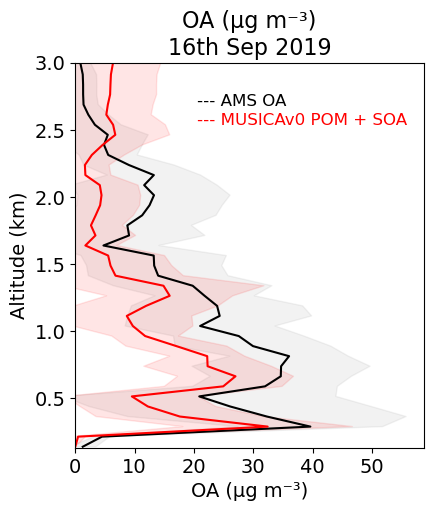

In [ ]:
fig, ax1 = plt.subplots(figsize=(4.5, 5))  # width=8 inches, height=10 inches≈çç ≈
ax1.plot( grouped_mean_oa_ams.values, bin_centers,color='k', label='Grouped Mean BC SP2')
ax1.fill_betweenx(bin_centers,
                  (grouped_mean_oa_ams.values - grouped_std_oa_ams.values),
                  (grouped_mean_oa_ams.values + grouped_std_oa_ams.values),
                  color='gray', alpha=0.1, label='Std Dev')

ax1.plot( grouped_mean_oa_mod.values, bin_centers,color='red', label='Grouped Mean BC MUSICAv0')
ax1.fill_betweenx(bin_centers,
                  (grouped_mean_oa_mod.values - grouped_std_oa_mod.values),
                  (grouped_mean_oa_mod.values + grouped_std_oa_mod.values),
                  color='red', alpha=0.1, label='Std Dev')

# Add the textbox with custom colors
ax1.text(0.35, 0.9, '--- AMS OA', transform=ax1.transAxes, fontsize=12,
        verticalalignment='center',color='k')
# Add red color to the first line
ax1.text(0.35, 0.85, '--- MUSICAv0 POM + SOA', transform=ax1.transAxes, fontsize=12,
        verticalalignment='center', color='red')
ax1.set_ylim(0.13,3)
ax1.set_xlim(0,)
ax1.set_xlabel('OA (µg m⁻³)',fontsize=14)
ax1.set_ylabel('Altitude (km)',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.title(f'OA (µg m⁻³)\n16th Sep 2019',fontsize=16)

plt.savefig(f'img/Figure9_AMSPaper.png',dpi=300,bbox_inches='tight')